In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from utils_plot import extract_data_from_dfgen
from utils_evaluation import create_df_for_cdf, sns_comparison
from utils_evaluation import create_df_for_lineplot, sns_ks
from utils_evaluation import weighted_ks_2samp

# Load Data

In [4]:
# Replace 'your_file.csv' with the actual path to your CSV file
path_raw = 'Synthetic_crash_scenarios.csv'
# path_raw = '/content/drive/MyDrive/Colab Notebooks/Thesis Crash Generation/New dataset/Synthetic_crash_scenarios.csv'
path_gen = 'Synthetic_Crash_02_trainval.csv'

# Read the CSV file into a DataFrame
df_raw = pd.read_csv(path_raw)
df_gen = pd.read_csv(path_gen)

In [5]:
## read the ID of train, val, test dataset
import pickle
with open('.\\utils_data\\Idx_02_split.pkl', 'rb') as f:
    list_train_val_test = pickle.load(f)
list_train_val_test = list_train_val_test[0]

ID_train, ID_val, ID_test = list_train_val_test[0], list_train_val_test[1], list_train_val_test[2]
ID_train, ID_val, ID_test = ID_train+1, ID_val+1, ID_test+1

In [6]:
V_l = np.zeros((5000,97))
V_f = np.zeros((5000,97))
D = np.zeros((5000,97))
Weight = np.zeros(5000)
for i in range(1,5001):
    v_l_i = df_raw[df_raw["id"]==i].iloc[-98:-1, 3].to_numpy()
    v_f_i = df_raw[df_raw["id"]==i].iloc[-98:-1, 2].to_numpy()
    d_i = df_raw[df_raw["id"]==i].iloc[-98:-1, 4].to_numpy() - df_raw[df_raw["id"]==i].iloc[-2, 4]
    weight_i = df_raw[df_raw["id"]==i].iloc[0, 6]
    V_l[i-1,:], V_f[i-1,:], D[i-1,:] = v_l_i, v_f_i, d_i
    Weight[i-1] = weight_i

import copy
V_l_raw = copy.deepcopy(V_l)
V_f_raw = copy.deepcopy(V_f)
D_raw = copy.deepcopy(D)
Weight_raw = copy.deepcopy(Weight)

C:\Users\minxiang\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


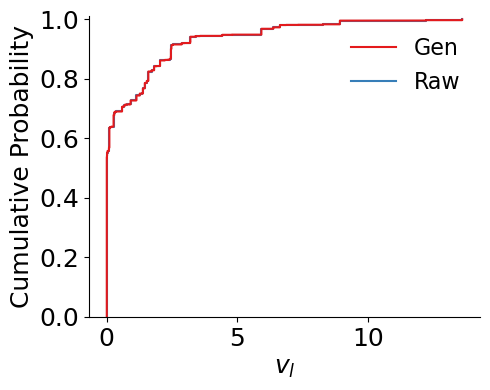

C:\Users\minxiang\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


p_value on t = 0s is 1.0


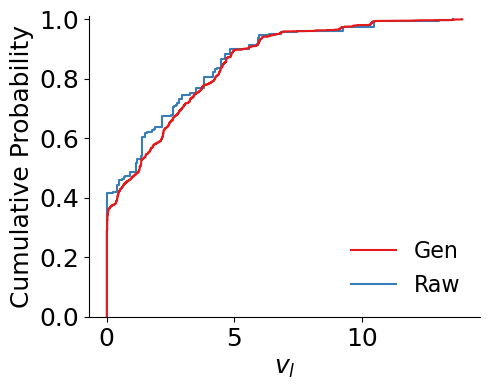

p_value on t = 1s is 0.6348651425391671


C:\Users\minxiang\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


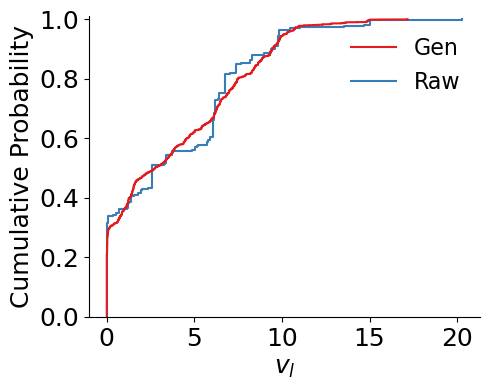

p_value on t = 2s is 0.8396704033097312


C:\Users\minxiang\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


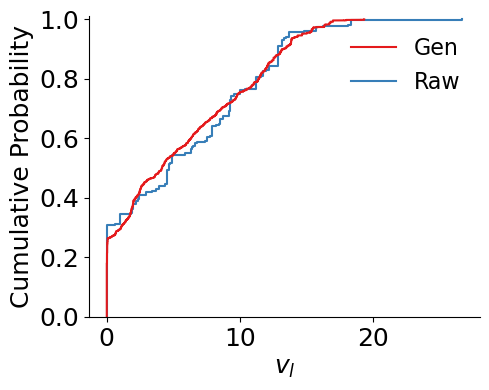

p_value on t = 3s is 0.5841996667076544


C:\Users\minxiang\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


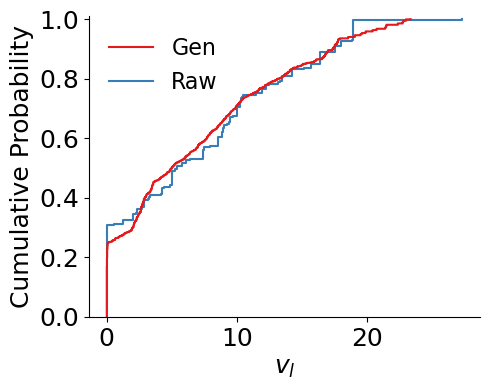

p_value on t = 4s is 0.47354850468626697


In [31]:
import copy
para = "v_l"
ID_eva = copy.deepcopy(ID_train)

## read the data
if para in ["v_l","v_f","d"]:
    Para_gen_eva = extract_data_from_dfgen(df_gen,ID_eva,para = para)
# elif para == "v_l_dt"
Weight_gen_eva = extract_data_from_dfgen(df_gen,ID_eva,para = 'weight')

if para == "v_l":
    Para_raw_eva = V_l_raw[ID_eva-1]
elif para == "v_f":
    Para_raw_eva = V_f_raw[ID_eva-1]
elif para == "d":
    Para_raw_eva = D_raw[ID_eva-1]
Weight_raw_eva = Weight_raw[ID_eva-1]

## plotting
for t in range(5):
    df_plot = create_df_for_cdf(
        [Para_gen_eva[:,-1-20*t],Para_raw_eva[:,-1-20*t]],
        ["Gen","Raw"],
        [Weight_gen_eva,Weight_raw_eva],
    )

    plt.figure(figsize=(5,4))
    sns_comparison(
        data = df_plot,
        x = "Data",
        weights = "Weight",
        hue = "Label",
        type='ecdf',
        # legend_off = True,
        xlabel=f"${para}$",
        ylabel="Cumulative Probability",
        xaxis_off=True,
        yaxis_off=True,
        # xticks_off=True,
        # yticks_off=True,
        ylim=[0,1.01],
    )
    plt.show()

    _, p_value = weighted_ks_2samp(
        Para_gen_eva[:,-1-20*t],Para_raw_eva[:,-1-20*t],
        Weight_gen_eva,Weight_raw_eva
    )
    print(f"p_value on t = {t}s is {p_value}")

C:\Users\minxiang\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\minxiang\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


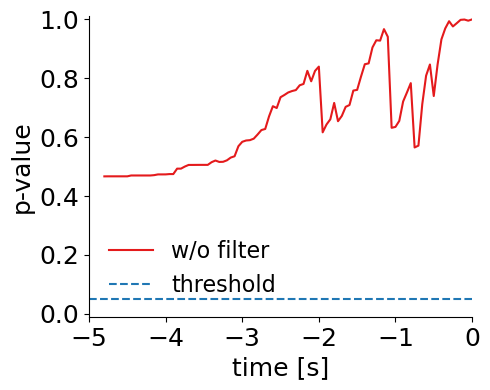

C:\Users\minxiang\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\minxiang\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


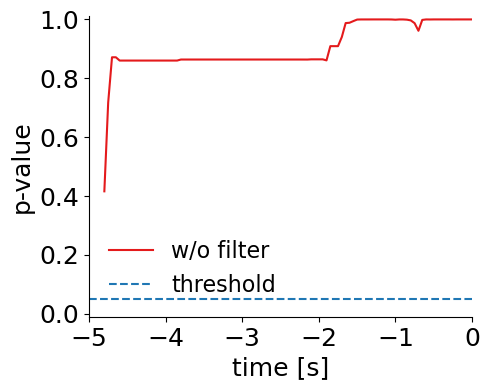

C:\Users\minxiang\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\minxiang\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


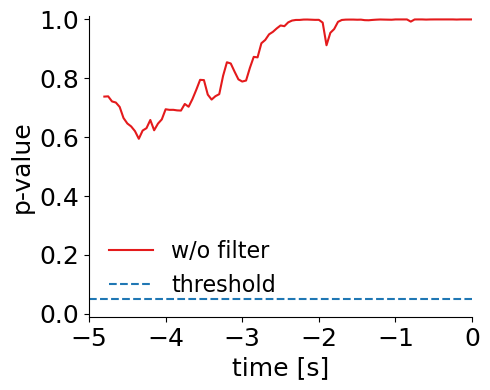

In [29]:
import copy
ID_eva = copy.deepcopy(ID_train)

for para in ["v_l","v_f","d"]:

    ## read the data
    if para in ["v_l","v_f","d"]:
        Para_gen_eva = extract_data_from_dfgen(df_gen,ID_eva,para = para)
    # elif para == "v_l_dt"
    Weight_gen_eva = extract_data_from_dfgen(df_gen,ID_eva,para = 'weight')
    
    if para == "v_l":
        Para_raw_eva = V_l_raw[ID_eva-1]
    elif para == "v_f":
        Para_raw_eva = V_f_raw[ID_eva-1]
    elif para == "d":
        Para_raw_eva = D_raw[ID_eva-1]
    Weight_raw_eva = Weight_raw[ID_eva-1]

    ## Calculate the p-value
    P_value = []
    for t in range(-1,-98,-1):
        
        _, p_value = weighted_ks_2samp(
            Para_gen_eva[:,t],Para_raw_eva[:,t],
            Weight_gen_eva,Weight_raw_eva
        )
        P_value.append(p_value)
    P_value = np.array(P_value)

    ## Plotting
    df_plot = create_df_for_lineplot(
        [P_value],
        ['w/o filter']
    )
    
    plt.figure(figsize=(5,4))
    sns_ks(data = df_plot,
           # legend_off = True,
           xlabel="time [s]",
           ylabel="p-value",
           xlim=[-5,0],
           ylim=[-0.01,1.01],
           # labels = {'w/o filter':'w/o filter'},
           xaxis_off=True,
           yaxis_off=True,
           # xticks_off=True,
           # yticks_off=True,
    )
    plt.show()

In [9]:
V_l_gen_test = extract_data_from_dfgen(df_gen,ID_test,para = 'v_l')
Weight_gen_test = extract_data_from_dfgen(df_gen,ID_test,para = 'weight')
V_l_raw_test = V_l_raw[ID_test-1]
Weight_raw_test = Weight_raw[ID_test-1]